In [5]:
from model import WorldModel

model = WorldModel(1000)
for i in range(100):
    model.step()


1 0
3 2
1 0
1 0
1 0
1 0
3 2
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 1
2 1
1 0
1 0
1 0
2 1
1 0
1 0
1 0
1 0
1 0
3 2
1 0
3 2
3 2
2 1
1 0
2 1
1 0
1 0
2 1
2 1
1 0
2 1
1 0
1 0
2 1
1 0
2 1
1 0
1 0
2 1
1 0
1 0
1 0
1 0
1 0
2 1
1 0
2 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 1
1 0
3 2
1 0
1 0
4 3
1 0
1 0
1 0
1 0
1 0
2 1
1 0
2 1
1 0
2 1
2 1
3 2
1 0
1 0
2 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
3 2
1 0
1 0
2 1
1 0
1 0
1 0
1 0
1 0
2 1
2 1
2 1
1 0
1 0
3 2
1 0
1 0
1 0
1 0
1 0
1 0
2 1
1 0
1 0
2 1
2 1
2 1
1 0
2 1
2 1
2 1
2 1
2 1
2 1
1 0
2 1
1 0
1 0
1 0
2 1
3 2
3 2
3 2
1 0
2 1
1 0
1 0
2 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
3 2
2 1
1 0
1 0
2 1
3 2
3 2
1 0
2 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
3 2
1 0
1 0
1 0
1 0
2 1
1 0
2 1
1 0
2 1
2 1
1 0
1 0
1 0
2 1
2 1
2 1
1 0
1 0
2 1
1 0
2 1
1 0
2 1
1 0
2 1
1 0
2 1
1 0
1 0
1 0
1 0
2 1
1 0
1 0
1 0
2 1
2 1
1 0
2 1
1 0
1 0
1 0
1 0
1 0
2 1
1 0
2 1
1 0
1 0
1 0
2 1
1 0
3 2
1 0
1 0
2 1
4 3
1 0
1 0
2 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 1
1 0
1 0
2 1
1 0
2 1
1 0
3 1
1 0
1 0
1 0


In [6]:
%matplotlib inline

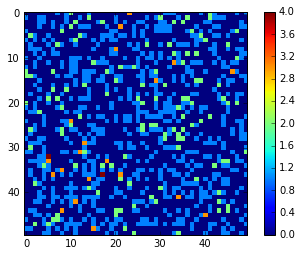

In [7]:
import numpy as np
import matplotlib.pyplot as plt

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()